## 1. Structure & Guidelines

The most important thing to do is define your problem statement (with your partner). This will be your nexus and will help you choose the dataset. Ideally this is the problem that you work on for the rest of the project. Since this is a big decision, you can change the problem statement and the dataset in the next assignment but no changes after that.

### Where to look for a dataset
There are too many sources for me to name all of them. **Kaggle** is the most popular. To search you can just use google or **Google Dataset Search** specifically. A lot of universities have their datasets available, like the one I use in my example below, which can be a great resource too. 


### EDA Study
Here are some mandatory material to help you get a basic understanding:
- https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
- https://www.youtube.com/watch?v=9m4n2xVzk9o

The sky is the limit with EDA, use this as a starting point and I expect you to go beyond. For instance I personally love this free book https://jakevdp.github.io/PythonDataScienceHandbook/ that dives deep into data science with python. <br>
This book is entirely in jupyter notebooks for even more code examples: https://allendowney.github.io/ElementsOfDataScience/


### Working with partners
To reiterate, you will decide the problem statement and the dataset together with you partner(s). I encourage you to work on the assignments together, disucss analytical processes and insights. If you are more experienced/knowledgable than your partner, please take the lead and help them understand any difficult concepts. 

**The idea is to foster collaboration and get support on the path to self-suffciency.**<br>
This means your assignment submissions, your final analyses and dashboard has to be completely your own. You should work on those independently. <br>
For example, discussing a specific assignent task is okay but copying your partners answers is not. Attempt to understand from them and write what you know so when I give my feedback it is valuable.

## 2. Assignment Questions/Tasks

1) Discuss & write down a problem statement
2) Find a Dataset(s) that will help you solve your problem
3) EDA Study: Go through the guides I link above and my example to get different perspective of how to approach EDA
4) Start your EDA by emulating the steps I take below and start forming hypotheses about the dataset and getting insights
5) Use 5 more visualizations or techniques of your choice that I dont use below
6) Write down insights about the dataset and how it relates back to your problem!!

## 3. Exploratory Data Analysis

This is the same example from class. I have kept things basic and barebones here so this can serve as a springboard for your analyses. In each step I have added some questions you should ask to get insights into the dataset. The answers to these and other questions that you ask might be through more statistical analysis and visualizations!

### PROBLEM STATEMENT:

DED is a chronic condition characterized by discomfort, irritation, and vision problems, which can severely impact quality of life and productivity. Despite its growing prevalence, many individuals remain unaware of the lifestyle factors that contribute to DED, and healthcare providers often lack the tools to offer personalized, actionable recommendations for prevention and management.

### DATASET: 

https://www.kaggle.com/datasets/arifmia/sleep-health-and-digital-screen-exposure-dataset 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


sns.set(style="whitegrid")

### 1. Data Loading & Quick Overview

In [46]:
#Dataset about Dry Eye Disease and related sleep issues/demographics
ded_df = pd.read_csv("Dry_Eye_Dataset.csv")

In [47]:
# Display first few rows
ded_df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


#### Questions to ponder: 

1. Does the data match your expectations or do you think you might need more information?
2. Do the columns/features align with your problem statement?

Yes

3. Any immediate signs of missing or corrupted data?

Nothing of note 


### 2. Shape & Features

In [48]:
# Shape : (rows, columns)
print(f"Dataset shape: {ded_df.shape}")

# Display all column names
print("\nFeature Names:")
print(ded_df.columns.tolist())

Dataset shape: (20000, 26)

Feature Names:
['Gender', 'Age', 'Sleep duration', 'Sleep quality', 'Stress level', 'Blood pressure', 'Heart rate', 'Daily steps', 'Physical activity', 'Height', 'Weight', 'Sleep disorder', 'Wake up during night', 'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Medical issue', 'Ongoing medication', 'Smart device before bed', 'Average screen time', 'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease']


#### Questions to ponder: 

1. Is the data large enough for the analysis?

Yes, it's quite large!

2. Are there any duplicate columns, or columns with similar information or ones that need re-naming? (I renamed some columns in my dataset below)

The columns are pretty clearly named but I think I'll do something similar to your example below, and replace spaces with underscores for easier use in code

In [61]:
#replacing " " with "_"
ded_df.columns = ded_df.columns.str.replace(" ","_")
ded_df.columns

Index(['Gender', 'Age', 'Sleep_duration', 'Sleep_quality', 'Stress_level',
       'Blood_pressure', 'Heart_rate', 'Daily_steps', 'Physical_activity',
       'Height', 'Weight', 'Sleep_disorder', 'Wake_up_during_night',
       'Feel_sleepy_during_day', 'Caffeine_consumption', 'Alcohol_consumption',
       'Smoking', 'Medical_issue', 'Ongoing_medication',
       'Smart_device_before_bed', 'Average_screen_time', 'Blue-light_filter',
       'Discomfort_Eye-strain', 'Redness_in_eye',
       'Itchiness/Irritation_in_eye', 'Dry_Eye_Disease'],
      dtype='object')

In [62]:
#Get unique target values
ded_df['Dry_Eye_Disease'].unique()

array(['Y', 'N'], dtype=object)

### 3. Data Types & Missing Values

In [63]:
# understanding the datatypes
ded_df.dtypes

Gender                          object
Age                              int64
Sleep_duration                 float64
Sleep_quality                    int64
Stress_level                     int64
Blood_pressure                  object
Heart_rate                       int64
Daily_steps                      int64
Physical_activity                int64
Height                           int64
Weight                           int64
Sleep_disorder                  object
Wake_up_during_night            object
Feel_sleepy_during_day          object
Caffeine_consumption            object
Alcohol_consumption             object
Smoking                         object
Medical_issue                   object
Ongoing_medication              object
Smart_device_before_bed         object
Average_screen_time            float64
Blue-light_filter               object
Discomfort_Eye-strain           object
Redness_in_eye                  object
Itchiness/Irritation_in_eye     object
Dry_Eye_Disease          

In [64]:
# Check missing values
print("\nMissing Values Count:")
print(ded_df.isnull().sum())


Missing Values Count:
Gender                         0
Age                            0
Sleep_duration                 0
Sleep_quality                  0
Stress_level                   0
Blood_pressure                 0
Heart_rate                     0
Daily_steps                    0
Physical_activity              0
Height                         0
Weight                         0
Sleep_disorder                 0
Wake_up_during_night           0
Feel_sleepy_during_day         0
Caffeine_consumption           0
Alcohol_consumption            0
Smoking                        0
Medical_issue                  0
Ongoing_medication             0
Smart_device_before_bed        0
Average_screen_time            0
Blue-light_filter              0
Discomfort_Eye-strain          0
Redness_in_eye                 0
Itchiness/Irritation_in_eye    0
Dry_Eye_Disease                0
dtype: int64


#### Questions to ponder: 

- Should we drop or impute missing values?
- Could missing data be an insight in and of itself?

This data has no missing values, likely because it was cleaned and processed to some extent before being posted to the Internet where we found it. This is a relief, although it's true that missing data may have also provided us with interesting information.

### 4. Summary Statistics & Outlier Detection

In [65]:
#Summary Stats
round(ded_df.describe(), 2)

,Age,Sleep_duration,Sleep_quality,Stress_level,Heart_rate,Daily_steps,Physical_activity,Height,Weight,Average_screen_time
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,31.42,7.00,3.00,2.99,79.91,10536.90,90.07,174.87,74.89,5.52
std,8.10,1.73,1.41,1.41,11.81,5752.73,52.32,14.72,14.73,2.61
min,18.00,4.00,1.00,1.00,60.00,1000.00,0.00,150.00,50.00,1.00
25%,24.00,5.50,2.00,2.00,70.00,6000.00,45.00,162.00,62.00,3.30
50%,31.00,7.00,3.00,3.00,80.00,11000.00,91.00,175.00,75.00,5.50
75%,39.00,8.50,4.00,4.00,90.00,16000.00,135.00,188.00,88.00,7.80
max,45.00,10.00,5.00,5.00,100.00,20000.00,180.00,200.00,100.00,10.00


#### Question to ponder
- Did you expect outliers? 
- Which features have unusually high or low values? What do they tell us about the data?
- Are there any suspicious patterns or extreme outliers?

The only/main "suspicious pattern" I'd note is the strange regularity of the scores--where, for a number of columns, the minimum is exactly 1.00, the maximum 5.00, and the mean 3.00 (or close to it). It's possible the data has already been normalized/standardized somehow, but it's also important to note/realize that several of these questions were presumably a rating on a 5-point scale, so that only whole-number answers were obtained (making the min/max look a bit suspicious even though they aren't really).

- Do we need to drop or transform these outliers?

In [66]:
ded_df["Stress_level"].value_counts().head(20)

Stress_level
3    4131
4    4028
1    4012
2    3929
5    3900
Name: count, dtype: int64

### 5. Univariate Analysis

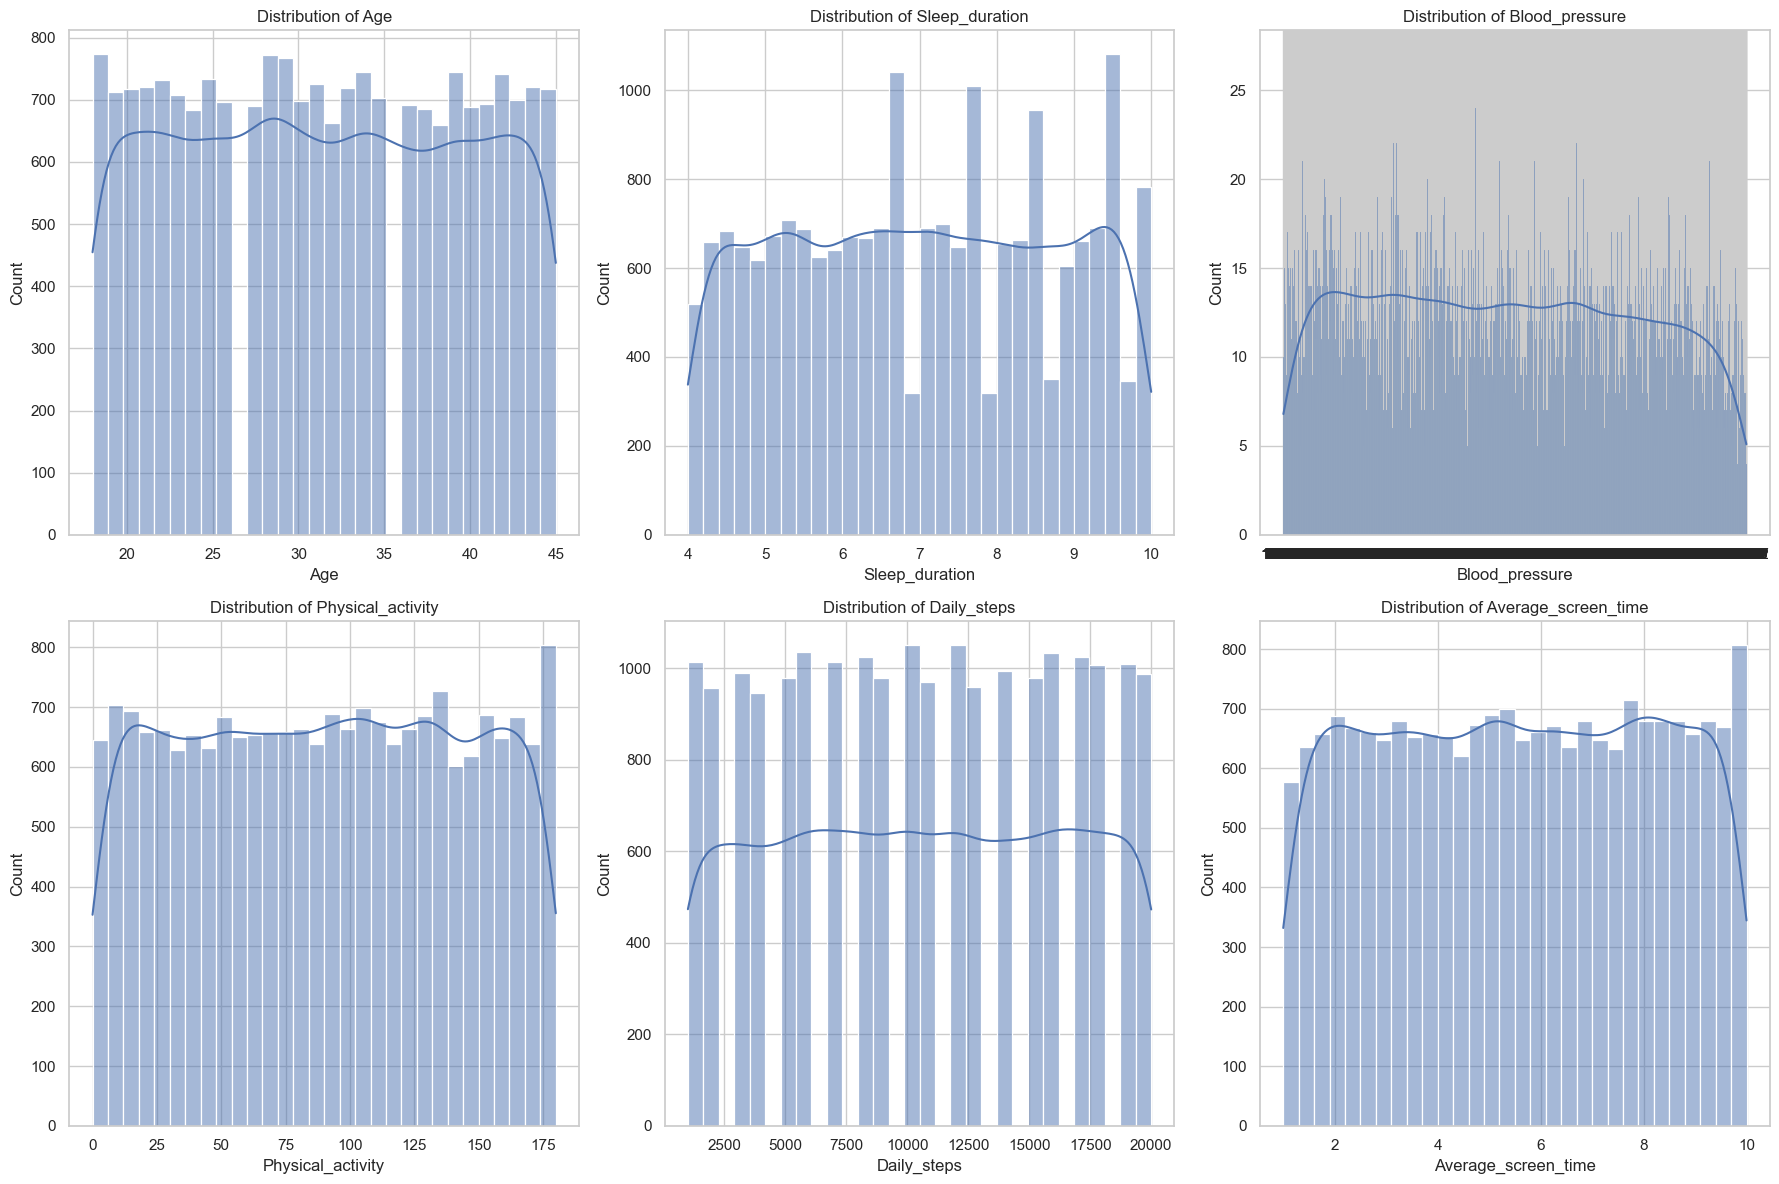

In [67]:
# Define features for visualization (Choosing the numerical features)
num_features = ['Age', 'Sleep_duration', 'Blood_pressure', 'Physical_activity', 'Daily_steps', 'Average_screen_time']

# Create a 2x3 grid for visualization
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Iterate over features and plot
for i, feature in enumerate(num_features):
    row, col = divmod(i, 3)
    sns.histplot(ded_df[feature], kde=True, bins=30, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

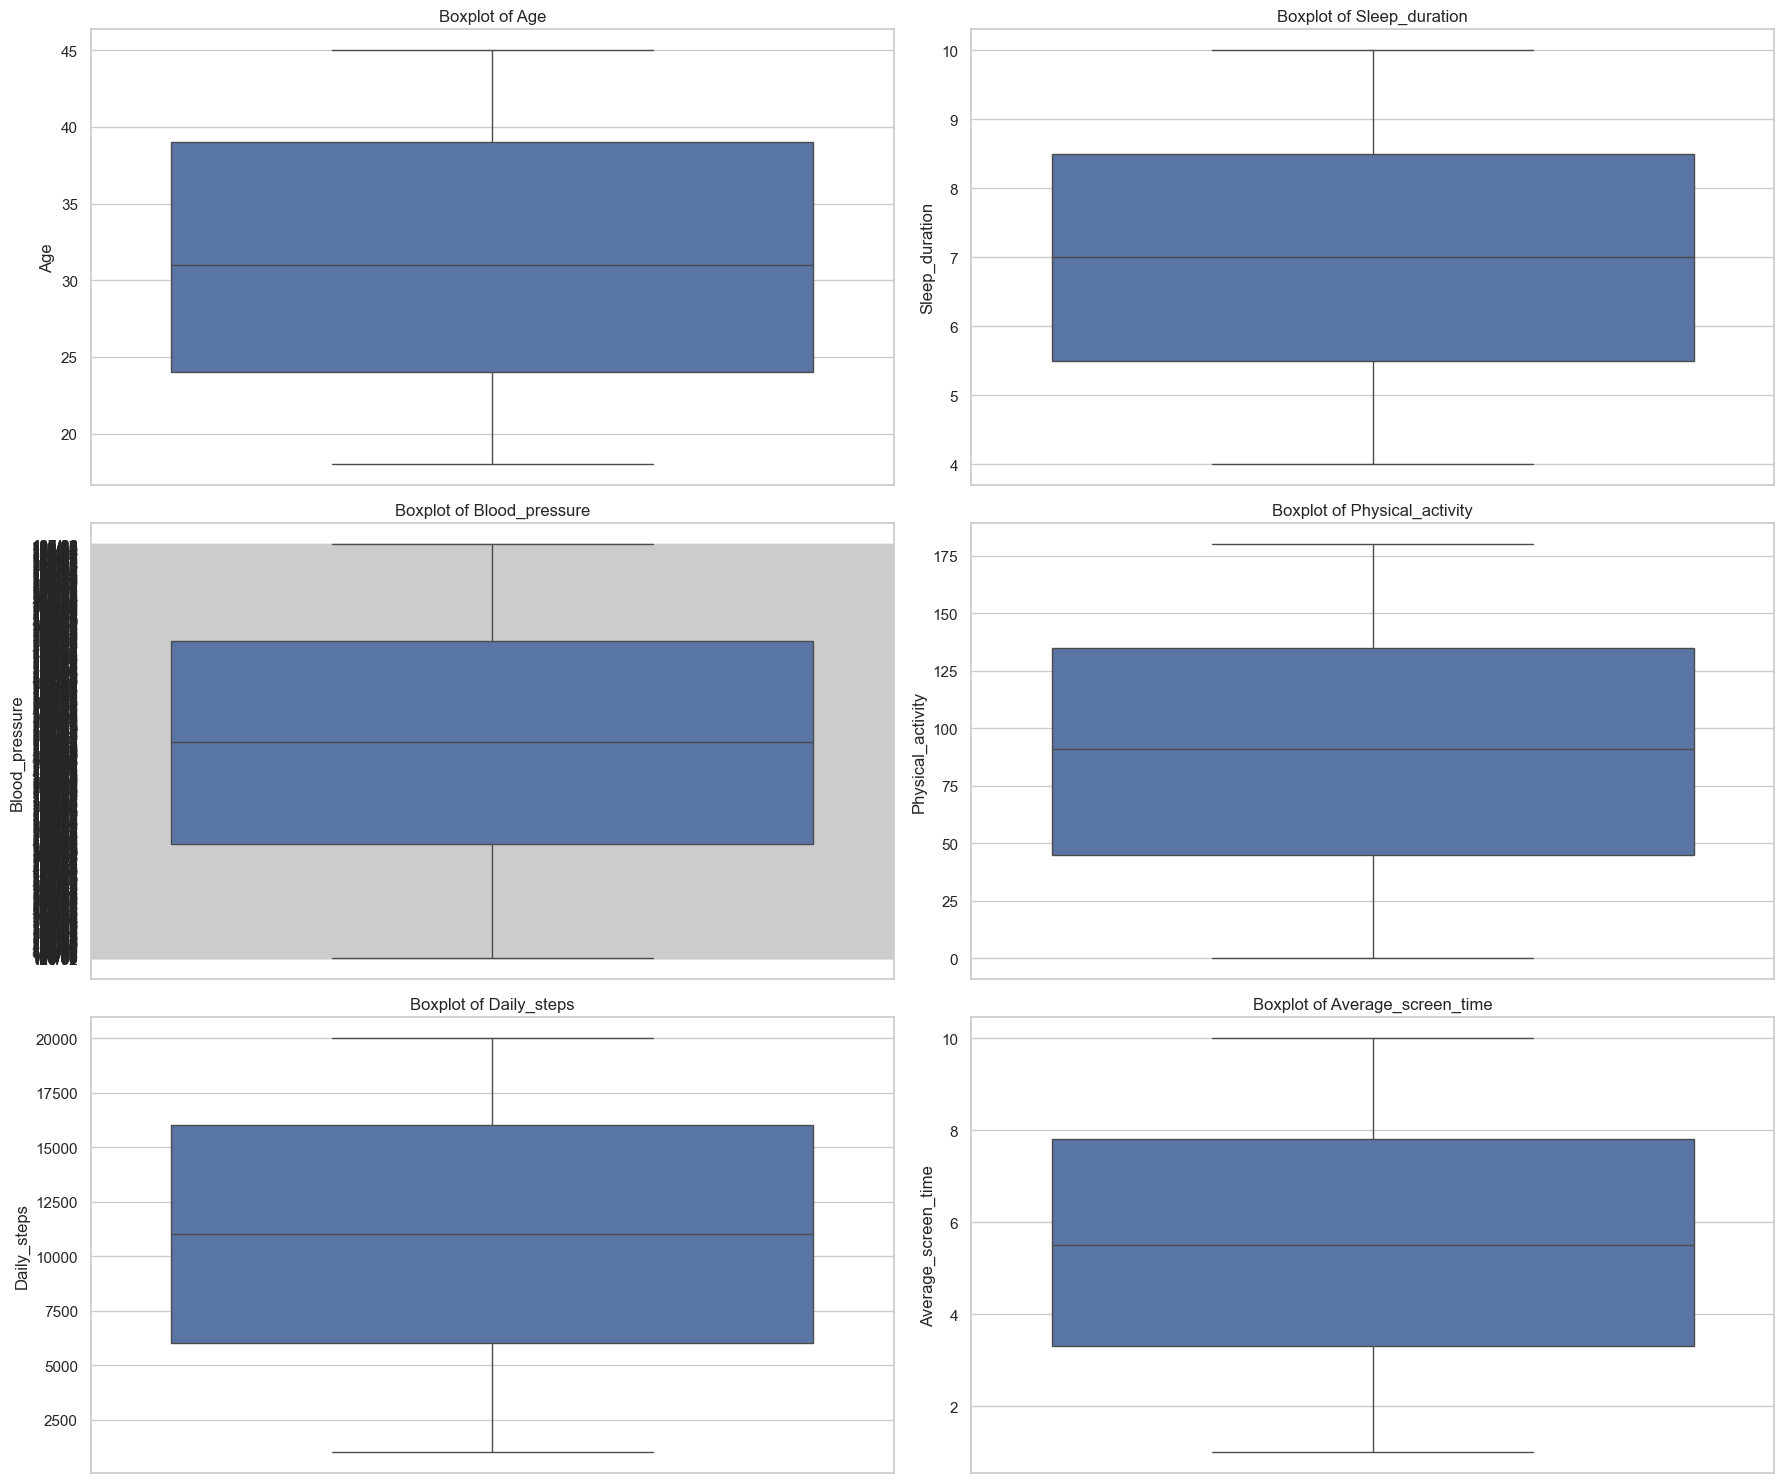

In [68]:
# Create boxplots for numerical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 2)
    sns.boxplot(y=ded_df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


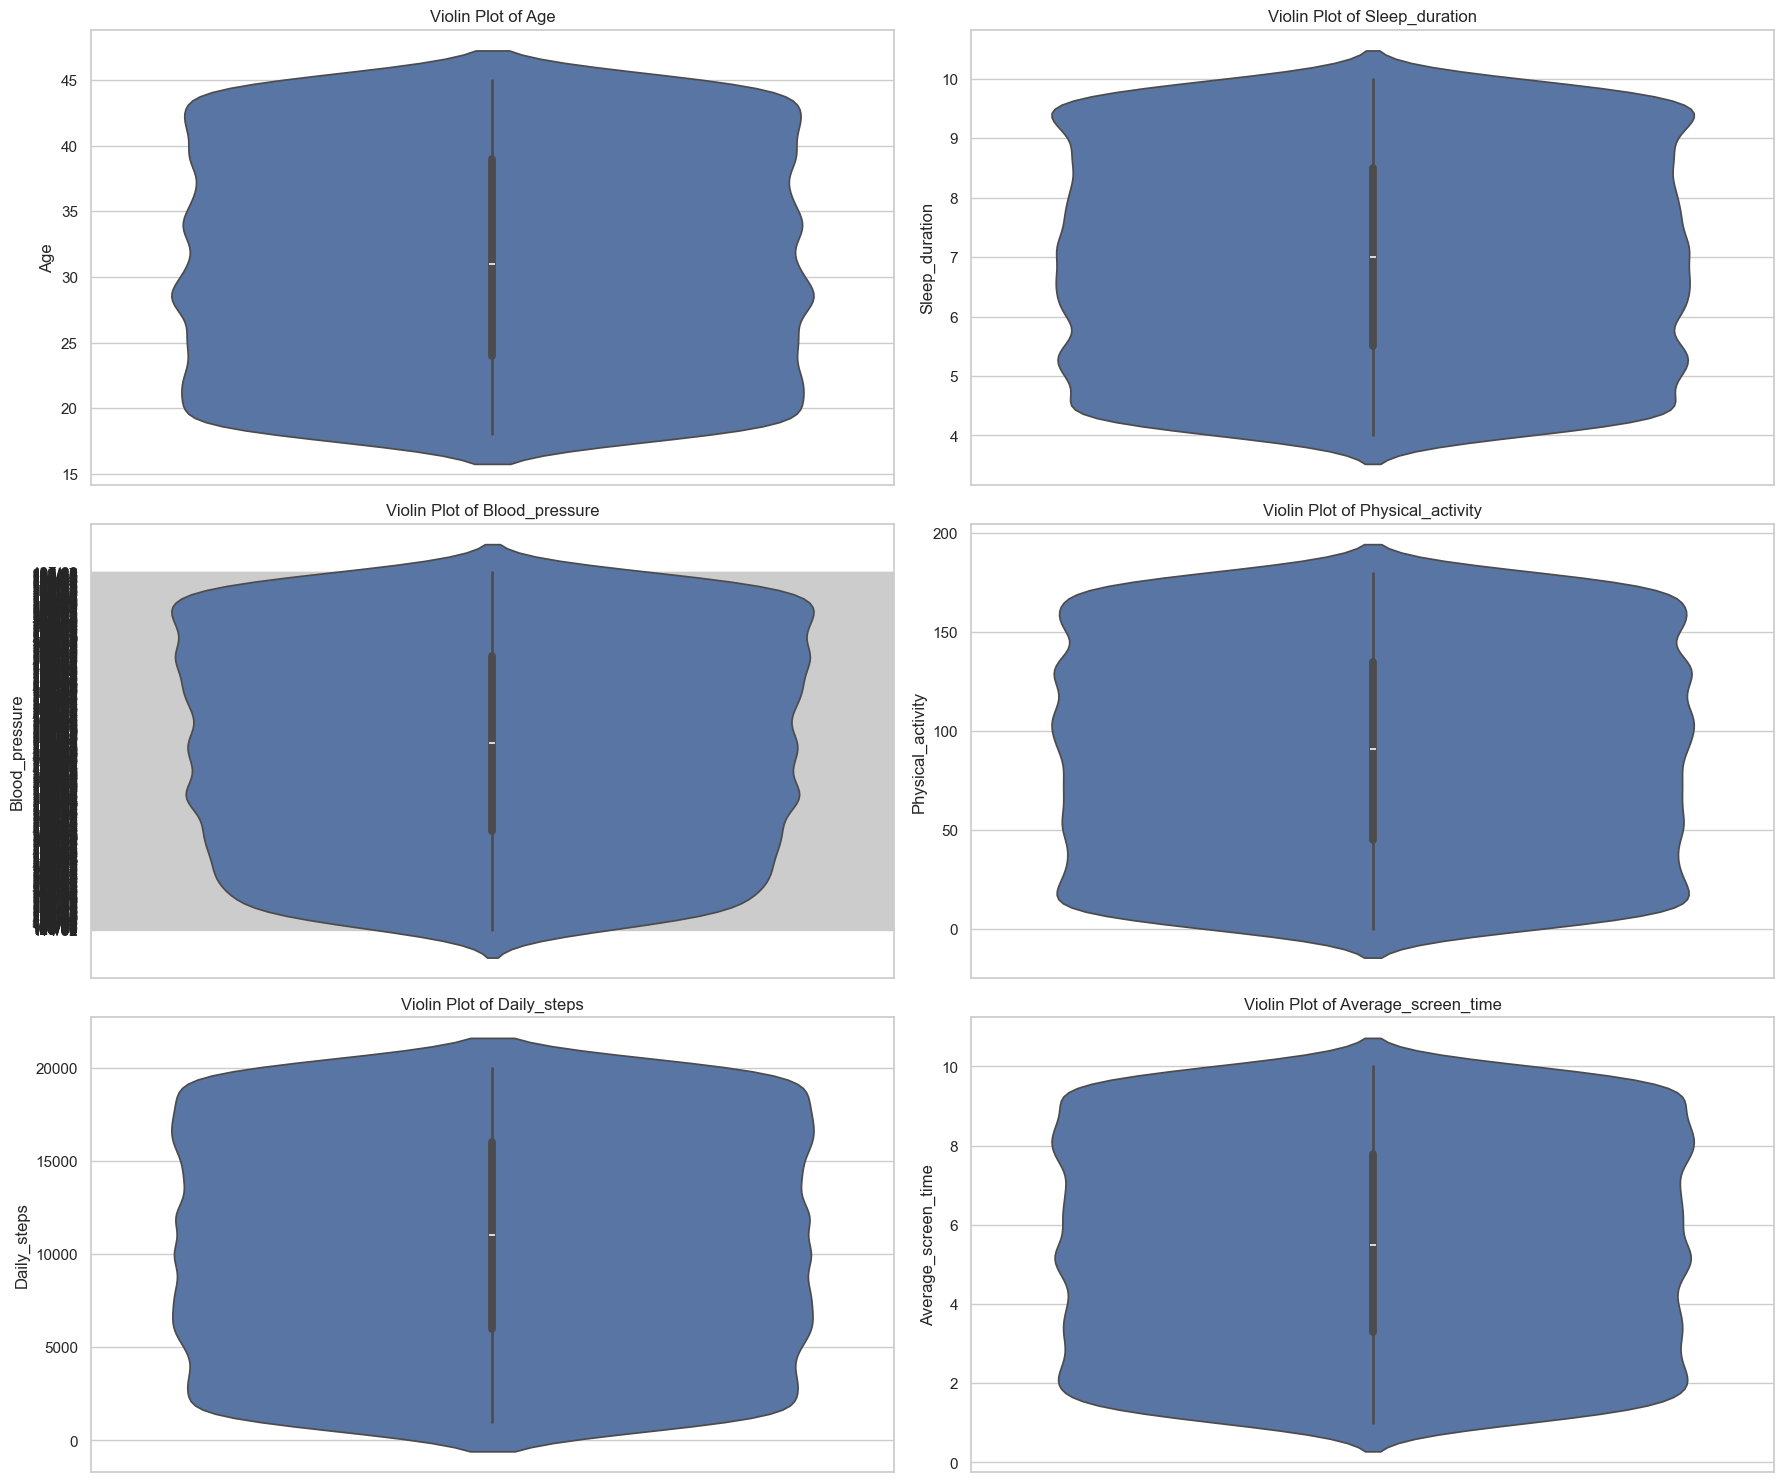

In [69]:
# Create violin plots for numerical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 2)
    sns.violinplot(y=ded_df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

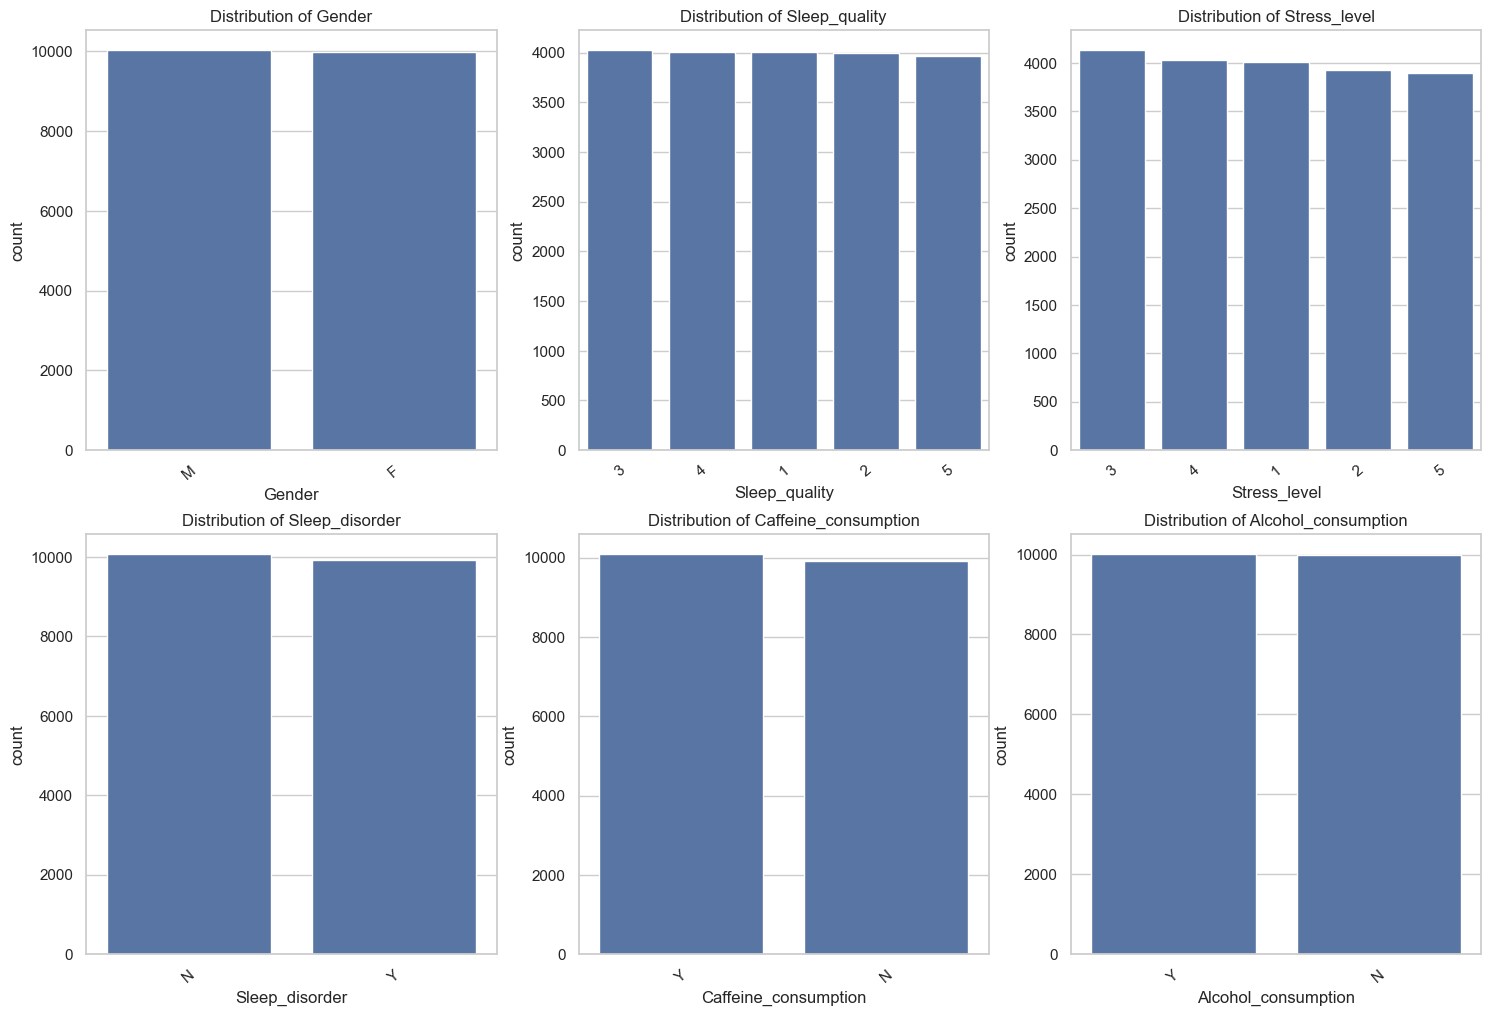

In [70]:
# Define categorical features for visualization
cat_features = ['Gender', 'Sleep_quality', 'Stress_level', 'Sleep_disorder', 'Caffeine_consumption', 'Alcohol_consumption', 'Ongoing_medication', 'Smart_device_before_bed', 'Discomfort_Eye-Strain', 'Dry_Eye_Disease']

# Create a 2x3 grid for visualization
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Iterate over categorical features and plot
for i, feature in enumerate(cat_features):
    row, col = divmod(i, 3)
    sns.countplot(data=ded_df, x=feature, order=ded_df[feature].value_counts().index, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {feature}')
    ax[row, col].tick_params(axis='x', rotation=40)  # Rotate x-axis labels for better readability
    
plt.tight_layout()
plt.show()

#### Questions to ponder:

- Are the numerical features skewed or roughly normal?

- Which categories dominate in each categorical feature? What does that tell you about each feature? 

Hmmm... each and every variable is strangely standardized/without much of an interesting shape, which we'll have to consider moving forward...

### 6. Bivariate Analysis

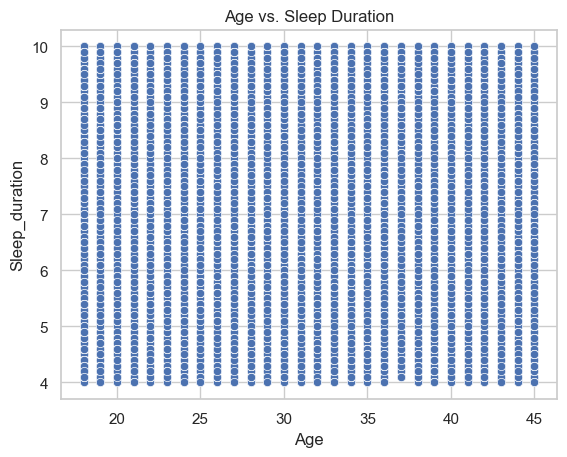

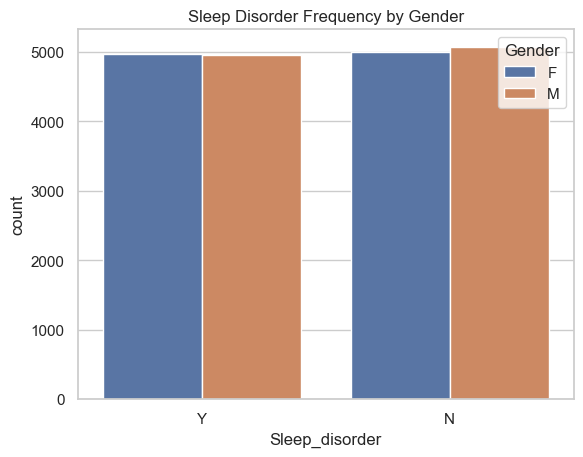

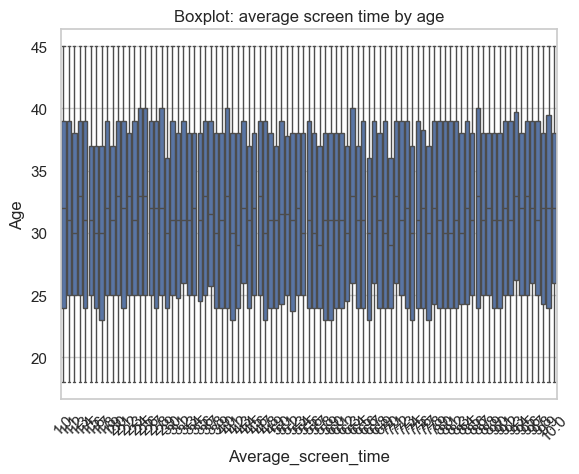

In [71]:
# Scatter plot for numerical vs. numerical
sns.scatterplot(data=ded_df, x='Age', y='Sleep_duration')
plt.title("Age vs. Sleep Duration")
plt.show()

# Grouped bar plot for categorical vs. categorical
sns.countplot(data=ded_df, x='Sleep_disorder', hue='Gender')
plt.title("Sleep Disorder Frequency by Gender")
#plt.xticks(rotation=45)
plt.show()

# Box plot for numerical vs. categorical
sns.boxplot(data=ded_df, x='Average_screen_time', y='Age')
plt.title("Boxplot: average screen time by age")
plt.xticks(rotation=45)
plt.show()

#### Questions to ponder

- Which numerical features are correlated?
- Do certain categories strongly associate with higher or lower numerical values?
- Any visible clusters or patterns in scatter plots?

### 7. Multivariate Analysis

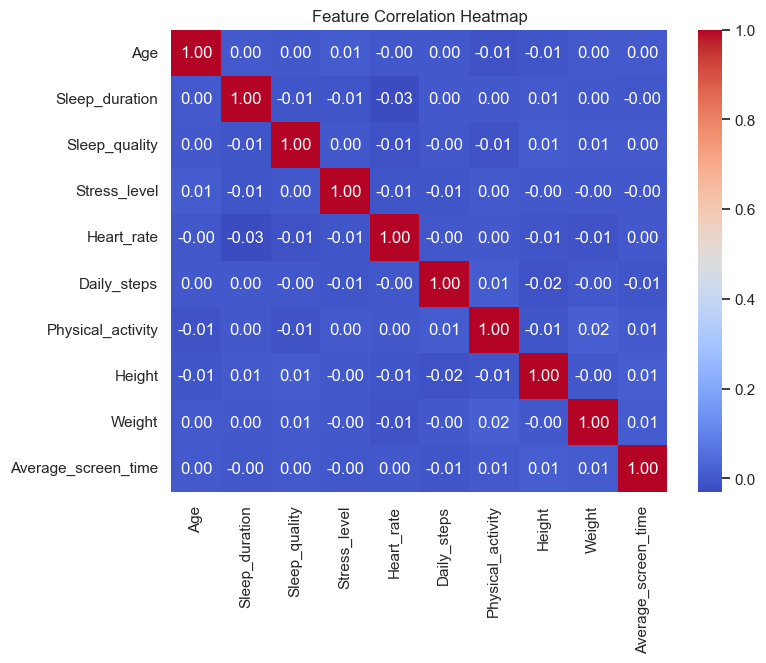

In [72]:
# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ded_df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Questions to ponder

- Which features show strong correlation?
- Should we remove or combine highly correlated features?
- Are there surprising correlations that warrant deeper investigation?

There seems to be essentially no correlation whatsoever, which is certainly frustrating/disappointing! We may need to explore another topic, or find a way to find differences within this data.

### 8. Next Steps

- Which features appear most important for the problem?
- What data cleaning or transformation steps remain?
- How will these insights guide the next phase (modeling, reporting, or business decisions)?

I think we'll really need to look into the data and see if there's anything of interest we can use for an analysis; otherwise, we may need to look elsewhere, unfortunately. That being said, the data is already very well cleaned/organized, it seems.

## Resources
- Another amazing free book I have used : https://greenteapress.com/thinkstats/thinkstats.pdf
- https://towardsdatascience.com/data-science-101-life-cycle-of-a-data-science-project-86cbc4a2f7f0/